In [1124]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [1125]:
df = pd.read_csv("surat_uncleaned.csv")
df.head()

,property_name,areaWithType,square_feet,transaction,status,floor,furnishing,facing,description,price_per_sqft,price
0,2 BHK Apartment for Sale in Dindoli Surat,Carpet Area,644 sqft,New Property,Poss. by Oct '24,5 out of 10,Unfurnished,West,"Luxury project with basement parking, Solar ro...","₹2,891 per sqft",₹33.8 Lac
1,2 BHK Apartment for Sale in Althan Surat,Super Area,1278 sqft,New Property,Poss. by Jan '26,6 out of 14,Unfurnished,South -West,2 And 3 BHK Luxurious Flat for Sell In New Alt...,"₹3,551 per sqft",₹45.4 Lac
2,2 BHK Apartment for Sale in Pal Gam Surat,Super Area,1173 sqft,Resale,Ready to Move,5 out of 13,Semi-Furnished,East,This affordable 2 BHK flat is situated along a...,"₹3,800 per sqft",₹44.6 Lac
3,2 BHK Apartment for Sale in Jahangirabad Surat,Carpet Area,700 sqft,New Property,Ready to Move,6 out of 14,Unfurnished,East,2 BHK Flat For sell IN Jahangirabad Prime Loca...,"₹3,966 per sqft",₹47 Lac
4,"2 BHK Apartment for Sale in Orchid Fantasia, P...",Super Area,1250 sqft,Orchid Fantasia,New Property,Unfurnished,2,2,"Multistorey Apartment for Sale in Palanpur, Su...","₹3,600 per sqft",₹45 Lac


In [1126]:
df.shape

(4525, 11)

In [1127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4525 entries, 0 to 4524
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   property_name   4525 non-null   object
 1   areaWithType    4525 non-null   object
 2   square_feet     4525 non-null   object
 3   transaction     4421 non-null   object
 4   status          4524 non-null   object
 5   floor           4480 non-null   object
 6   furnishing      4185 non-null   object
 7   facing          3936 non-null   object
 8   description     3154 non-null   object
 9   price_per_sqft  4157 non-null   object
 10  price           4525 non-null   object
dtypes: object(11)
memory usage: 389.0+ KB


In [1128]:
df.isnull().sum()

property_name        0
areaWithType         0
square_feet          0
transaction        104
status               1
floor               45
furnishing         340
facing             589
description       1371
price_per_sqft     368
price                0
dtype: int64

In [1129]:
df.duplicated().sum()

109

In [1130]:
df.drop_duplicates(keep='first', inplace=True)

In [1131]:
df['transaction'].unique()

array(['New Property', 'Resale', 'Orchid Fantasia', 'Unfurnished',
       'Orchid Gardenia', 'Congo', 'Furnished', nan, 'Semi-Furnished',
       'Main Road, Garden/Park', '1', '3', '4', 'Yes', 'No',
       'Mahavir Nagar', '3 Covered', 'Shagun Residency', '2', 'Main Road',
       '10 m', 'Other', '1 Covered', 'Soham Elegance', 'Garden/Park',
       'Aakash Echo Point', 'Sundaram Residency', '5', 'Jolly Residency',
       'Mangalam Heights', 'Green City', 'Pool, Garden/Park, Main Road',
       '6', 'Co-operative Society', 'Vatsalya Bungalows', '20 Covered,',
       'Raghuvir Silverstone', '8 m', 'Casa Rivera'], dtype=object)

In [1132]:
df['transaction'].replace(['New Property','Unfurnished','Furnished','Semi-Furnished','1','3','4','Yes','No','2','5','6',],np.nan,inplace=True)

C:\Users\bbuser\AppData\Local\Temp\ipykernel_28840\1206789327.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['transaction'].replace(['New Property','Unfurnished','Furnished','Semi-Furnished','1','3','4','Yes','No','2','5','6',],np.nan,inplace=True)


In [1133]:
df['transaction'].fillna(df['transaction'].mode()[0],inplace=True)

In [1134]:
df.isnull().sum()

property_name        0
areaWithType         0
square_feet          0
transaction          0
status               1
floor               45
furnishing         331
facing             563
description       1331
price_per_sqft     358
price                0
dtype: int64

In [1135]:
df.areaWithType.unique()

array(['Carpet Area', 'Super Area', 'Plot Area', 'Built Area',
       'Transaction', 'Status'], dtype=object)

In [1136]:
df.areaWithType.replace(['Transaction', 'Status'], np.nan, inplace=True)
df.areaWithType.fillna(df.areaWithType.mode()[0],inplace=True)

C:\Users\bbuser\AppData\Local\Temp\ipykernel_28840\3957683506.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.areaWithType.replace(['Transaction', 'Status'], np.nan, inplace=True)


In [1137]:
df.isnull().sum()

property_name        0
areaWithType         0
square_feet          0
transaction          0
status               1
floor               45
furnishing         331
facing             563
description       1331
price_per_sqft     358
price                0
dtype: int64

In [1138]:
df['price']=df['price'].str.replace(r'\W+','', regex=True)
df['price']=df['price'].str.replace(r'\D+','', regex=True)
df['price']=df['price'].str.split().str[0].astype(float)

In [1139]:
df['square_feet']=df['square_feet'].str.replace(r'\W+','', regex=True)
df['square_feet']=df['square_feet'].str.replace(r'\D+','', regex=True)
df['square_feet']=df['square_feet'].str.split().str[0].astype(float)

In [1140]:
df['price_per_sqft']=df['price_per_sqft'].str.replace(r'\W+','', regex=True)
df['price_per_sqft']=df['price_per_sqft'].str.replace(r'\D+','', regex=True)
df['price_per_sqft']=df['price_per_sqft'].str.split().str[0].astype(float)

In [1141]:
df['price'].fillna(df['price'].mode()[0], inplace=True)

C:\Users\bbuser\AppData\Local\Temp\ipykernel_28840\1439273253.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['price'].fillna(df['price'].mode()[0], inplace=True)


In [1142]:
df['square_feet'].fillna(df['square_feet'].mode()[0],inplace=True)

C:\Users\bbuser\AppData\Local\Temp\ipykernel_28840\1795540564.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['square_feet'].fillna(df['square_feet'].mode()[0],inplace=True)


In [1143]:
df['price_per_sqft'].fillna(df['price_per_sqft'].mode()[0],inplace=True)

C:\Users\bbuser\AppData\Local\Temp\ipykernel_28840\2397341046.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['price_per_sqft'].fillna(df['price_per_sqft'].mode()[0],inplace=True)


In [1144]:
df['status'].unique()

array(["Poss. by Oct '24", "Poss. by Jan '26", 'Ready to Move',
       'New Property', "Poss. by Dec '25", "Poss. by Jun '24",
       "Poss. by Sep '25", "Poss. by Feb '26", '1 out of 7',
       "Poss. by Jul '24", "Poss. by Dec '26", "Poss. by Apr '25",
       "Poss. by Jan '25", 'Freehold', '21 X 50.2', "Poss. by Dec '24",
       "Poss. by Aug '25", "Poss. by Feb '25", '3 out of 10', 'Resale',
       'Co-operative Society', '120 X 105', '3 out of 7',
       "Poss. by May '26", '36 X 15', "Poss. by Aug '24", '2',
       '3 out of 3', '52.5 X 32.1', '3 out of 5', '5 out of 5',
       '12 X 35.92', '13 out of 14', '7.29 X 14', '4 out of 5',
       'Ground out of 1', '3 out of 4', 'Ground out of 10',
       'Ground out of 2', '20 X 40', '16.4 X 60', '11 out of 14',
       '9.42 X 126', '25 X 12', nan, '2 out of 4', '54 X 15', '21 X 57',
       'Power Of Attorney', "Poss. by Jul '25", "Poss. by May '25",
       "Poss. by Mar '26", "Poss. by Jun '26", "Poss. by Nov '24",
       '26.7 X 55.

In [1145]:
df.drop(columns=['status'], inplace=True)

In [1146]:
df.isnull().sum()

property_name        0
areaWithType         0
square_feet          0
transaction          0
floor               45
furnishing         331
facing             563
description       1331
price_per_sqft       0
price                0
dtype: int64

In [1147]:
df.furnishing.unique()

array(['Unfurnished', 'Semi-Furnished', '2', 'Anand Aspire', 'East', '1',
       'Furnished', nan, '3', '1 Covered,', '2 Covered', '1 Covered',
       'Freehold', 'West', '26 Covered', 'Main Road', 'No', 'North',
       '1 Open', '6', 'Co-operative Society', '> 10', '4',
       'Nilkanth Seven Homes', 'Aagam Navkar', '10 Open',
       'Vinayak Enclave', '5 Covered,', 'South -West',
       'Pool, Garden/Park, Main Road', 'Garden/Park, Main Road', '7 m',
       '30 m', '50 Covered,', 'South', '12 m', 'Yes', 'Gruham Luxuria',
       '2 Covered,', 'Congo', 'Prayosha Shine', 'North - East',
       'Vaishnodevi Ideal Homes', 'Santvan Lexon', 'Sangini Epitome',
       '100 Covered', 'Nirvana Gladiolus', '7', '5 Covered', '5',
       'Raghuvir Spalex', '50 Open', 'South - East', 'North - West',
       '20 m', '20 Open', 'Garden/Park', '10 m', 'Sattvam',
       'Pramukh Amaya', 'Sun Sarvam', '3 Covered', '2 Open', '6 m',
       'Avadh Kimberly', 'Happy Glorious', 'DMD Aura', 'Freedom Tower',
  

In [1148]:
furnishing=['Unfurnished', 'Semi-Furnished','Furnished']
df['furnishing'].where(df['furnishing'].isin(furnishing), np.nan, inplace=True)

C:\Users\bbuser\AppData\Local\Temp\ipykernel_28840\1524441468.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['furnishing'].where(df['furnishing'].isin(furnishing), np.nan, inplace=True)


In [1149]:
df.furnishing.unique()

array(['Unfurnished', 'Semi-Furnished', nan, 'Furnished'], dtype=object)

In [1150]:
df.isnull().sum()

property_name        0
areaWithType         0
square_feet          0
transaction          0
floor               45
furnishing        1212
facing             563
description       1331
price_per_sqft       0
price                0
dtype: int64

In [1151]:
df.furnishing.fillna('Unknown',inplace=True)

C:\Users\bbuser\AppData\Local\Temp\ipykernel_28840\1333187301.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.furnishing.fillna('Unknown',inplace=True)


In [1152]:
df.isnull().sum()

property_name        0
areaWithType         0
square_feet          0
transaction          0
floor               45
furnishing           0
facing             563
description       1331
price_per_sqft       0
price                0
dtype: int64

In [1153]:
df.facing.unique()

array(['West', 'South -West', 'East', '2', 'Main Road', nan,
       'North - East', 'South - East', '1', 'Freehold', 'Garden/Park',
       '3', 'North - West', 'South', '6', 'Co-operative Society',
       'Garden/Park, Main Road', '1 Covered', 'No', '30 m', 'North',
       'Varni Siddheshwar Heights', '5', 'Salasar Icon', 'Green Valley',
       'Shyam enclave', 'Rajhans Platinum', 'Vitthal Bunglows', '1 Open',
       'Royal Nest', 'Rajhans Wings', '2 Open',
       'Gordhan Green Valley Mangalam Park Bldg S',
       'Apt Swaminagar Society', 'Swagat Clifton', 'Akash',
       'Green Arcade Phase 1 And 2', 'Satyam Tower', '4',
       'Suryanjali Residency', 'GHB Mukhya Mantri Gruh Yojana',
       'Vibrant Eco Park', 'Madhav Residency', 'Shiv Drashti Residency',
       'Gruham Luxuria', 'SHANKHESHWER COMPLAX', 'JT Stuti Highland',
       'Times Galaxy', '100 m', 'Savani Prayosha Pride',
       'Shayona Janki Residency', 'Sundaram Residency', '6 m',
       'Silicon Palm', 'Raj Abhishek City

In [1154]:
facing_pattern = r"^\d+(\s+[a-zA-Z]+)?$"
facing=[]
for i in df['facing']:
    if re.match(facing_pattern, str(i).strip()):
        facing.append(i)
df['facing'] = df['facing'].replace(facing, np.nan)
df['facing'] = df['facing'].fillna(df['facing'].mode()[0])

In [1155]:
df.isnull().sum()

property_name        0
areaWithType         0
square_feet          0
transaction          0
floor               45
furnishing           0
facing               0
description       1331
price_per_sqft       0
price                0
dtype: int64

In [1156]:
df.drop(columns=['description'], inplace=True)

In [1157]:
df.isnull().sum()

property_name      0
areaWithType       0
square_feet        0
transaction        0
floor             45
furnishing         0
facing             0
price_per_sqft     0
price              0
dtype: int64

In [1158]:
df.dtypes

property_name      object
areaWithType       object
square_feet       float64
transaction        object
floor              object
furnishing         object
facing             object
price_per_sqft    float64
price             float64
dtype: object

In [1159]:
df.duplicated().sum()

35

In [1160]:
df.drop_duplicates(keep='first', inplace=True)

In [1161]:
df.floor.unique()

array(['5 out of 10', '6 out of 14', '5 out of 13', 'Unfurnished',
       'New Property', '7 out of 10', '3 out of 14', '6 out of 13',
       '1 out of 1', '1 out of 13', '4 out of 7', '3 out of 3',
       '2 out of 6', '3 out of 5', '2 out of 5', '3 out of 12',
       '5 out of 5', 'Resale', 'Ground out of 1',
       'Lower Basement out of 7', '1 out of 5', '7 out of 14',
       '9 out of 14', '5 out of 12', '7 out of 13', '1 out of 2',
       '2 out of 10', 'Freehold', '12 out of 14', '10 out of 14',
       '2 out of 12', '1 out of 4', '13 out of 14', '4 out of 14',
       '6 out of 10', '2 out of 4', '3 out of 4', '9 out of 13',
       'Upper Basement out of 5', '3 out of 10', '1 out of 3',
       '4 out of 4', 'Ground out of 2', 'Lower Basement out of 2',
       'Ground out of 4', nan, 'Ground out of 5', '4 out of 10',
       'Ground out of 14', 'Ground out of 6', '5 out of 6', '8 out of 9',
       '4 out of 5', '2 out of 7', '7 out of 7', 'Ground out of 3',
       '4 out of 8', '8

In [1162]:
df_floor = df.floor.str.extract(r'(\d+)\s*(out of)\s*(\d+)')

In [1163]:
df['num_of_floor']= df_floor[0]

In [1164]:
df['total_floors'] = df_floor[2]

In [1165]:
df.head()

,property_name,areaWithType,square_feet,transaction,floor,furnishing,facing,price_per_sqft,price,num_of_floor,total_floors
0,2 BHK Apartment for Sale in Dindoli Surat,Carpet Area,644.0,Resale,5 out of 10,Unfurnished,West,2891.0,338.0,5,10
1,2 BHK Apartment for Sale in Althan Surat,Super Area,1278.0,Resale,6 out of 14,Unfurnished,South -West,3551.0,454.0,6,14
2,2 BHK Apartment for Sale in Pal Gam Surat,Super Area,1173.0,Resale,5 out of 13,Semi-Furnished,East,3800.0,446.0,5,13
3,2 BHK Apartment for Sale in Jahangirabad Surat,Carpet Area,700.0,Resale,6 out of 14,Unfurnished,East,3966.0,47.0,6,14
4,"2 BHK Apartment for Sale in Orchid Fantasia, P...",Super Area,1250.0,Orchid Fantasia,Unfurnished,Unknown,East,3600.0,45.0,NaN,NaN


In [1166]:
df.drop(columns=['floor'], inplace=True)

In [1167]:
df.isnull().sum()

property_name        0
areaWithType         0
square_feet          0
transaction          0
furnishing           0
facing               0
price_per_sqft       0
price                0
num_of_floor      1230
total_floors      1230
dtype: int64

In [1168]:
df['BHK']=df['property_name'].str.extract(r'(\d+)').astype(float)

In [1169]:
df.isnull().sum()

property_name        0
areaWithType         0
square_feet          0
transaction          0
furnishing           0
facing               0
price_per_sqft       0
price                0
num_of_floor      1230
total_floors      1230
BHK                601
dtype: int64

In [1170]:
df.BHK.fillna(df['BHK'].mode()[0],inplace=True)

C:\Users\bbuser\AppData\Local\Temp\ipykernel_28840\2236631343.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.BHK.fillna(df['BHK'].mode()[0],inplace=True)


In [1171]:
df.isnull().sum()

property_name        0
areaWithType         0
square_feet          0
transaction          0
furnishing           0
facing               0
price_per_sqft       0
price                0
num_of_floor      1230
total_floors      1230
BHK                  0
dtype: int64

In [1172]:
df.dtypes

property_name      object
areaWithType       object
square_feet       float64
transaction        object
furnishing         object
facing             object
price_per_sqft    float64
price             float64
num_of_floor       object
total_floors       object
BHK               float64
dtype: object

In [1173]:
df=df.astype({'num_of_floor':float, 'total_floors':float})

In [1174]:
df.num_of_floor.fillna(df['num_of_floor'].mode()[0],inplace=True)

df.total_floors.fillna(df['total_floors'].mode()[0],inplace=True)

C:\Users\bbuser\AppData\Local\Temp\ipykernel_28840\2640421622.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.num_of_floor.fillna(df['num_of_floor'].mode()[0],inplace=True)
C:\Users\bbuser\AppData\Local\Temp\ipykernel_28840\2640421622.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

In [1175]:
df.isnull().sum()

property_name     0
areaWithType      0
square_feet       0
transaction       0
furnishing        0
facing            0
price_per_sqft    0
price             0
num_of_floor      0
total_floors      0
BHK               0
dtype: int64

In [1176]:
df.dtypes

property_name      object
areaWithType       object
square_feet       float64
transaction        object
furnishing         object
facing             object
price_per_sqft    float64
price             float64
num_of_floor      float64
total_floors      float64
BHK               float64
dtype: object

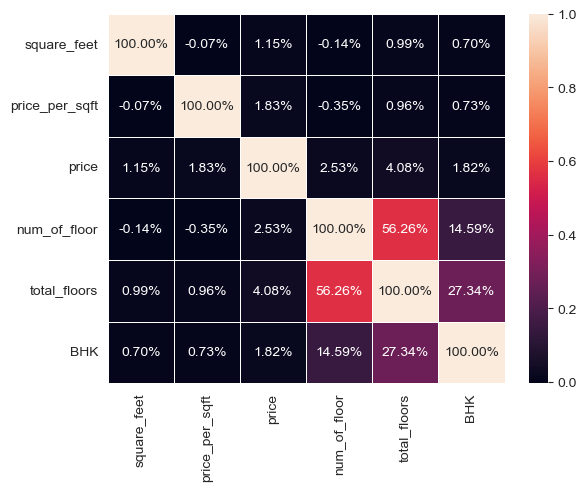

In [1177]:
corr_matrix = df.select_dtypes(include='number').corr()
sns.heatmap(corr_matrix,linewidths=0.4,annot = True,fmt = '.2%')
plt.show()

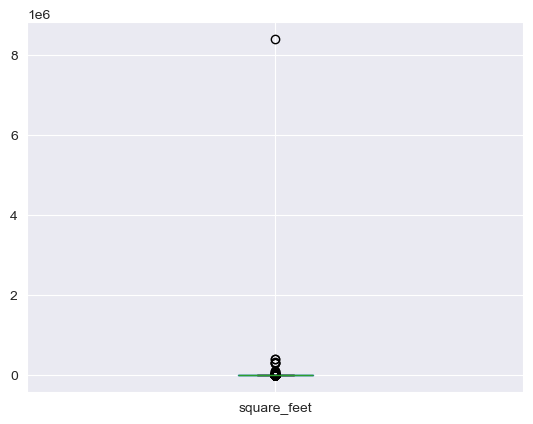

In [1178]:
df.boxplot('square_feet')
plt.show()

In [1179]:
def iqr_outlier(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    LL = Q1 - 1.5 * IQR
    UL = Q3 + 1.5 * IQR
    return LL,UL

In [1180]:
l,u= iqr_outlier("square_feet")
print(l,u)

-1000.0 3800.0


In [1181]:
df = df[df['square_feet'].between(l,u)]

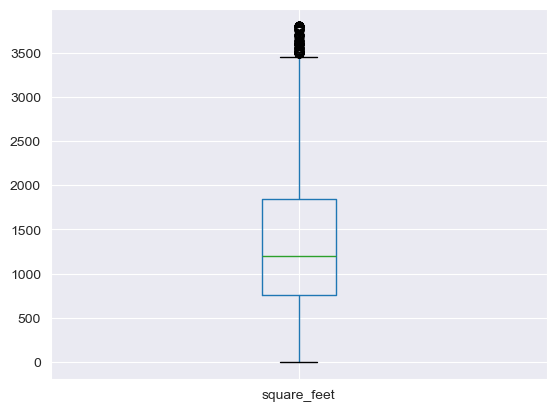

In [1182]:
df.boxplot('square_feet')
plt.show()

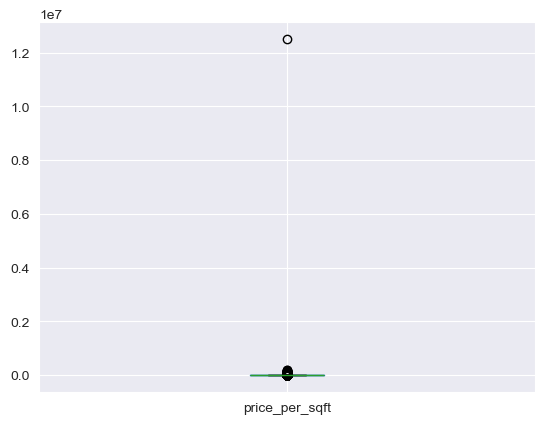

In [1183]:
df.boxplot('price_per_sqft')
plt.show()

In [1184]:
l,u= iqr_outlier("price_per_sqft")
print(l,u)

485.0 9069.0


In [1185]:
df = df[df['price_per_sqft'].between(l,u)]

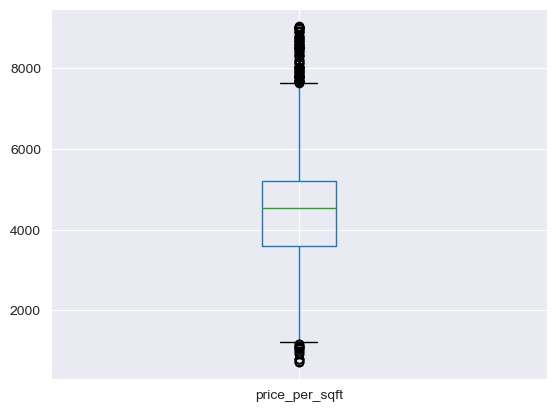

In [1186]:
df.boxplot('price_per_sqft')
plt.show()

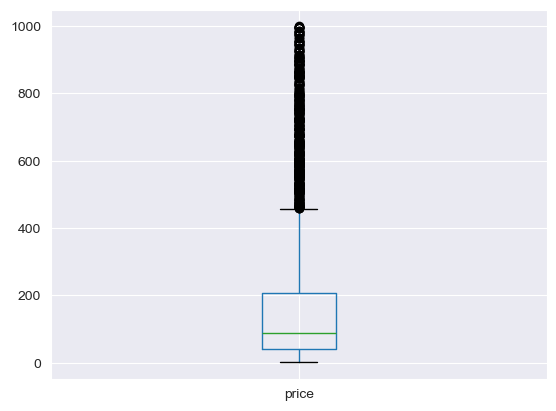

In [1187]:
df.boxplot('price')
plt.show()

In [1188]:
l,u= iqr_outlier("price")
print(l,u)

-210.5 457.5


In [1189]:
df = df[df['price'].between(l,u)]

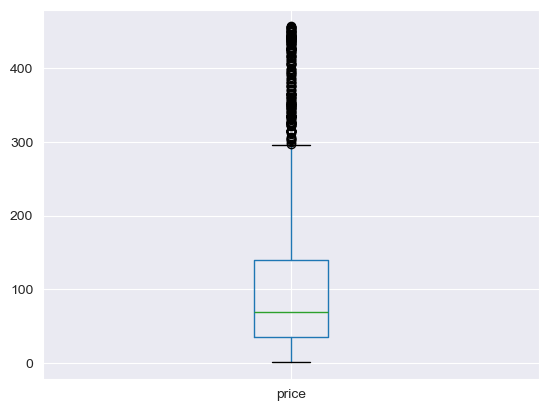

In [1190]:
df.boxplot('price')
plt.show()

In [1191]:
l = LabelEncoder()

In [1192]:
categorical_columns = df.select_dtypes(include = 'object').columns

In [1193]:
categorical_columns

Index(['property_name', 'areaWithType', 'transaction', 'furnishing', 'facing'], dtype='object')

In [1194]:
for i in categorical_columns:
     df[i] = l.fit_transform(df[i])

In [1195]:
df.head()

,property_name,areaWithType,square_feet,transaction,furnishing,facing,price_per_sqft,price,num_of_floor,total_floors,BHK
0,532,1,644.0,17,2,133,2891.0,338.0,5.0,10.0,2.0
1,486,3,1278.0,17,2,116,3551.0,454.0,6.0,14.0,2.0
2,638,3,1173.0,17,1,21,3800.0,446.0,5.0,13.0,2.0
3,567,1,700.0,17,2,21,3966.0,47.0,6.0,14.0,2.0
4,635,3,1250.0,12,3,21,3600.0,45.0,5.0,13.0,2.0


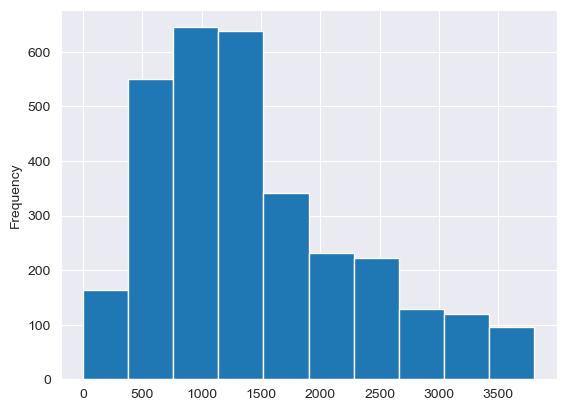

In [1196]:
df['square_feet'].plot (kind='hist')
plt.show()

In [1197]:
df['square_feet_boxcox'], fitted_lambda = boxcox(df['square_feet'])

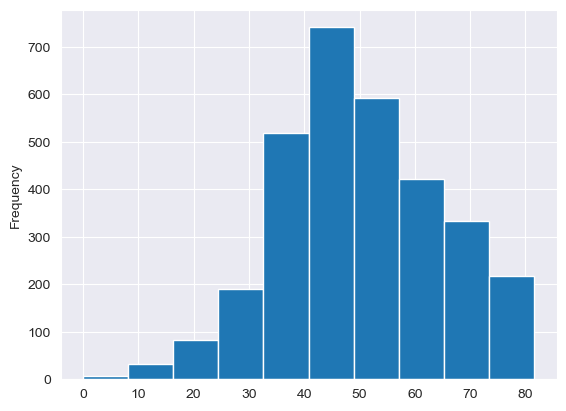

In [1198]:
df['square_feet_boxcox'].plot (kind='hist')
plt.show()

In [1199]:
df.columns

Index(['property_name', 'areaWithType', 'square_feet', 'transaction',
       'furnishing', 'facing', 'price_per_sqft', 'price', 'num_of_floor',
       'total_floors', 'BHK', 'square_feet_boxcox'],
      dtype='object')

In [1200]:
df.head()

,property_name,areaWithType,square_feet,transaction,furnishing,facing,price_per_sqft,price,num_of_floor,total_floors,BHK,square_feet_boxcox
0,532,1,644.0,17,2,133,2891.0,338.0,5.0,10.0,2.0,36.319315
1,486,3,1278.0,17,2,116,3551.0,454.0,6.0,14.0,2.0,49.794513
2,638,3,1173.0,17,1,21,3800.0,446.0,5.0,13.0,2.0,47.880060
3,567,1,700.0,17,2,21,3966.0,47.0,6.0,14.0,2.0,37.751485
4,635,3,1250.0,12,3,21,3600.0,45.0,5.0,13.0,2.0,49.292935


In [1201]:
scaling_columns = ['square_feet', 'price_per_sqft', 'price']

In [1202]:
scaler = StandardScaler()
df[scaling_columns] = scaler.fit_transform(df[scaling_columns])

In [1203]:
# Define features (X) and target (y) from the DataFrame
X = df.drop('price', axis=1)
y = df['price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model (metrics explained later)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("--- Linear Regression Results ---")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

--- Linear Regression Results ---
Mean Squared Error (MSE): 0.88
R-squared (R2): 0.14
